## Power Grid Analysis

For our AIPI 510 Data Storytelling project, we intend to use the EIA.gov EIA-930 Data. This shows the generation and energy consumption for the electrical powergrid in the United States.

## Load the Data

In [50]:
import urllib.request
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os

path = Path()

files = {
    "EIA930_BALANCE_2025_Jan_Jun.csv": "https://www.eia.gov/electricity/gridmonitor/sixMonthFiles/EIA930_BALANCE_2025_Jan_Jun.csv"
}

# Download each file
for key, value in files.items():
    filename = path / key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)

## Read Data

Our first step is to understand the data and read the rows and columns that exist. We need to explore and understand what all of the columns actually mean before we can work with the data.

In [2]:
filename = "EIA930_BALANCE_2025_Jan_Jun.csv"
df = pd.read_csv(filename)
print(df.columns)

df.head(10)

Index(['Balancing Authority', 'Data Date', 'Hour Number',
       'Local Time at End of Hour', 'UTC Time at End of Hour',
       'Demand Forecast (MW)', 'Demand (MW)', 'Net Generation (MW)',
       'Total Interchange (MW)', 'Sum(Valid DIBAs) (MW)',
       'Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)',
       'Total Interchange (MW) (Imputed)', 'Demand (MW) (Adjusted)',
       'Net Generation (MW) (Adjusted)', 'Total Interchange (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower Excluding Pumped Storage',
       'Net Generation (MW) from Pumped Storage',
       'Net Generation (MW) from Solar without Integrated Battery Storage',
       'Net Generation (MW) from Solar with Integrated Battery Storage',
       'Net Generation (MW) from Wind without Integrated Battery Storage',
       'Net Ge

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Solar witho Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind without Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind with Integrated Battery Storage (Adjusted),Net Generation (MW) from Battery Storage (Adjusted),Net Generation (MW) from Other Energy Storage (Adjusted),Net Generation (MW) from Unknown Energy Storage (Adjusted),Net Generation (MW) from Geothermal (Adjusted),Net Generation (MW) from Other Fuel Sources (Adjusted),Net Generation (MW) from Unknown Fuel Sources (Adjusted),Region
0,AECI,01/01/2025,1,01/01/2025 1:00:00 AM,01/01/2025 7:00:00 AM,2770.0,2831.0,2847.0,16.0,16.0,...,NaN,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
1,AECI,01/01/2025,2,01/01/2025 2:00:00 AM,01/01/2025 8:00:00 AM,2787.0,2830.0,2886.0,56.0,56.0,...,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
2,AECI,01/01/2025,3,01/01/2025 3:00:00 AM,01/01/2025 9:00:00 AM,2808.0,2808.0,2845.0,37.0,37.0,...,NaN,359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
3,AECI,01/01/2025,4,01/01/2025 4:00:00 AM,01/01/2025 10:00:00 AM,2821.0,2829.0,2757.0,-72.0,-72.0,...,NaN,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
4,AECI,01/01/2025,5,01/01/2025 5:00:00 AM,01/01/2025 11:00:00 AM,2891.0,2859.0,2694.0,-165.0,-165.0,...,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
5,AECI,01/01/2025,6,01/01/2025 6:00:00 AM,01/01/2025 12:00:00 PM,2987.0,2941.0,2608.0,-333.0,-333.0,...,NaN,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
6,AECI,01/01/2025,7,01/01/2025 7:00:00 AM,01/01/2025 1:00:00 PM,3116.0,3010.0,2593.0,-417.0,-417.0,...,NaN,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
7,AECI,01/01/2025,8,01/01/2025 8:00:00 AM,01/01/2025 2:00:00 PM,3247.0,3078.0,2568.0,-510.0,-510.0,...,NaN,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
8,AECI,01/01/2025,9,01/01/2025 9:00:00 AM,01/01/2025 3:00:00 PM,3251.0,3133.0,2549.0,-584.0,-584.0,...,NaN,269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
9,AECI,01/01/2025,10,01/01/2025 10:00:00 AM,01/01/2025 4:00:00 PM,3079.0,3108.0,2678.0,-430.0,-430.0,...,NaN,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW


## Understanding the data

(What we talked about me doing: Data generation what BAs mean, Biases, Explain Demand vs Generation, time series data and it is hourly, difference between Demand imputed and adjusted, explain interchange. Go through each energy source and put it on a list. Drop and Impute and explain why.)

At first, there appear to be a lot of columns. If we look at the first ten, we can see that there are a lot of NaN values. However, the reason is because this is for only one balancing authority. Each balancing authority uses different types of power generation to meet demand. We're only seeing the first ten hours from the AECI balancing authority. It would be illogical to assume that one authority could have *every* type of power generation. If we look at another balancing authority, we can see the missing values are different. Below is the AVA balancing authority. You can see that they generate power with solar, whereas AECI does not. The key takeaway is that different balancing authorities have different ways of generating power.

In [3]:
print(df.iloc[4345:4355])

     Balancing Authority   Data Date  Hour Number Local Time at End of Hour  \
4345                 AVA  01/01/2025            3     01/01/2025 3:00:00 AM   
4346                 AVA  01/01/2025            4     01/01/2025 4:00:00 AM   
4347                 AVA  01/01/2025            5     01/01/2025 5:00:00 AM   
4348                 AVA  01/01/2025            6     01/01/2025 6:00:00 AM   
4349                 AVA  01/01/2025            7     01/01/2025 7:00:00 AM   
4350                 AVA  01/01/2025            8     01/01/2025 8:00:00 AM   
4351                 AVA  01/01/2025            9     01/01/2025 9:00:00 AM   
4352                 AVA  01/01/2025           10    01/01/2025 10:00:00 AM   
4353                 AVA  01/01/2025           11    01/01/2025 11:00:00 AM   
4354                 AVA  01/01/2025           12    01/01/2025 12:00:00 PM   

     UTC Time at End of Hour  Demand Forecast (MW)  Demand (MW)  \
4345  01/01/2025 11:00:00 AM                1445.0       1425.0

## Explaining the meaning of our columns

After a quick glance at the data, we can tell based on the dates and times that we have time series data down to the hour. However, there are a couple things that are not as intuitive that are explained below:

First, it is important to understand what some of the terminology means:

 - Balancing Authority (BA's): are the companies responsible for balancing electricity supply, demand, and interchange on their electric systems in real time. There are many BAs and the spreadsheet with more information about what they mean can be found here: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.eia.gov%2Felectricity%2F930-content%2FEIA930_Reference_Tables.xlsx&wdOrigin=BROWSELINK

 - Demand: Derived by taking the total metered net electricity generation within its
electric system and subtracting the total metered net electricity interchange occuring
between the BA and its neighboring BAs. Total demand should equal or approximate the sum of demand by subregion.

 - Net generation: Derived from the metered outpout of electric generating units in a
BA's electric system. Generators on the distribution system are typically not included. Total net generation should equal the sum of net generation by energy source.

 - Total interchange: Net metered tie line flow from one BA to another directly
connnected BA. Typically, demand equals net generation minus total interchange.

Next it is important to understand the differences between imputed and adjusted data values:

 - Adjusted values: To incorporate commercial arrangements, such as dynamic scheduling arrangements and interchanges on pseudo ties, BAs normally adjust their metered physical flow values to produce this alternative view of grid operations.
  - Imputed values: With imputed values, BAs occasionally report anomalous data values such as blank, zero, negative, and unreasonably high or low values. We perform a basic imputation process for several data elements. The process for imputing is slightly different for Demand, Net Generation, and Total Interchange, but usually, the EIA imputes values if the value is missing or reported as negative, zero, or at least 1.5 times greater than the maximum of past total demand values reported by that BA.

Third, there are three sources of bias in this data. These biases include:

1. There are several generation BAs that do not directly serve retail customers. Therefore
they do not report demand or demand forecasts.
2. City of Homestead (HST) has a small number of local generators that do not always produce
electricity, so it will not always have net generation to report.
3. Dynamic Scheduling and Pseduo ties can introduce some level of bias onto demand, demand
forecast, net generation and interchange.

Finally, it is important to understand the sources of energy. The sources of energy include                    Coal,
         Natural Gas,
         Nuclear,
         All Petroleum Products,
         Hydropower Excluding Pumped Storage,
         Pumped Storage',
         Solar without Integrated Battery Storage,
         Solar with Integrated Battery Storage,
         Wind without Integrated Battery Storage,
         Wind with Integrated Battery Storage,
         Battery Storage,
         Other Energy Storage,
         Unknown Energy Storage,
         Geothermal,
         Other Fuel Sources,
         Unknown Fuel Sources


____________________Double check the adjusted explanation for these columns__________________________

## Understanding Demand by Balancing Authority

We have three demand values that matter to us. We have just demand, adjusted demand, and imputed demand. We can create a new DataFrame comparing the three demands to see how they interact with each other. For most of them, we can see that $Demand_{Adjusted}=Demand+Demand_{Imputed}$. We can do this by Adding up the Demand and Imputed Demand which should equal the Adjusted Demand. We can also add another column that sets this all to zero by taking the adjusted demand and subtracting it from the sum of the demand and imputed demand.

### Conclusion
From this exploration, we can conclude that using the Adjusted Demand is the most useful metric to use for demand.

In [46]:
demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW)"].sum()
adjusted_demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW) (Adjusted)"].sum()
imputed_demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW) (Imputed)"].sum()

demand_df = pd.concat([demand_by_ba, adjusted_demand_by_ba, imputed_demand_by_ba], axis=1)

demand_df["Demand + Imputed"] = demand_df["Demand (MW)"] + demand_df["Demand (MW) (Imputed)"]

demand_df["Check Difference"] = demand_df["Demand (MW) (Adjusted)"] - (
        demand_df["Demand (MW)"] + demand_df["Demand (MW) (Imputed)"])

demand_df = demand_df.reset_index()

demand_df.to_csv("demand_comparison.csv", index=False)

## Understanding Generation by Balancing Authority

We can run nearly identical code as above to understand generation and look for discrepancies. We can see that, again, for most of the balancing authorities, we have $Generation_{Adjusted}=Generation+Generation_{Imputed}$ once again. Some of them are inaccurate. Next, we'll see which ones are inaccurate in both generation and demand, just in generation, and just in demand.

### Conclusion
Again, we can see that adjusted generation is the most useful metric to us here.

In [47]:
generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW)"].sum()
adjusted_generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW) (Adjusted)"].sum()
imputed_generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW) (Imputed)"].sum()

generation_df = pd.concat([generation_by_ba, adjusted_generation_by_ba, imputed_generation_by_ba], axis=1)

generation_df["Generation + Imputed"] = generation_df["Net Generation (MW)"] + generation_df[
    "Net Generation (MW) (Imputed)"]

generation_df["Check Difference"] = generation_df["Net Generation (MW) (Adjusted)"] - (
        generation_df["Net Generation (MW)"] + generation_df["Net Generation (MW) (Imputed)"])

generation_df = generation_df.reset_index()

generation_df.to_csv("generation_comparison.csv", index=False)

## Understanding Inaccuracies

We will now locate balancing authorities where the check difference is non zero. We can then turn it into a set and find the intersections and differences. This will tell us which balancing authorities have inaccuracies and whether it is just in demand, generation, or both.

### Conclusion
One interesting thing we can see from this, is that in almost all of the inaccurate imputations, the region is NW (Northwest). One hypothesis is that balancing authorities in the Northwest may use different types of power generation than other regions. We can now look into seeing which type of power generation is used most per region.

In [45]:
def show_with_region(df, ba_list):
    return df[df["Balancing Authority"].isin(ba_list)][["Balancing Authority", "Region"]]


demand_discrep = demand_df.loc[demand_df["Check Difference"] != 0, "Balancing Authority"]
gen_discrep = generation_df.loc[generation_df["Check Difference"] != 0, "Balancing Authority"]

demand_discrep = set(demand_discrep)
gen_discrep = set(gen_discrep)

both = demand_discrep.intersection(gen_discrep)
only_demand = demand_discrep.difference(gen_discrep)
only_gen = gen_discrep.difference(demand_discrep)

print("Discrepancies in both demand and generation:")
print(show_with_region(demand_df, both))

print("")
print("Discrepancies only in demand:")
print(show_with_region(demand_df, only_demand))

print("")
print("Discrepancies only in generation:")
print(show_with_region(generation_df, only_gen))

Discrepancies in both demand and generation:
   Balancing Authority Region
1                  AVA     NW
31                NEVP     NW
43                 SCL     NW
44                 SEC    FLA
47                SOCO     SE

Discrepancies only in demand:
   Balancing Authority Region
29                LGEE   MIDW
39                PSCO     NW
48                 SPA   CENT
57                WACM     NW

Discrepancies only in generation:
   Balancing Authority Region
36                 PGE     NW


## Understanding Sources of Power Generation

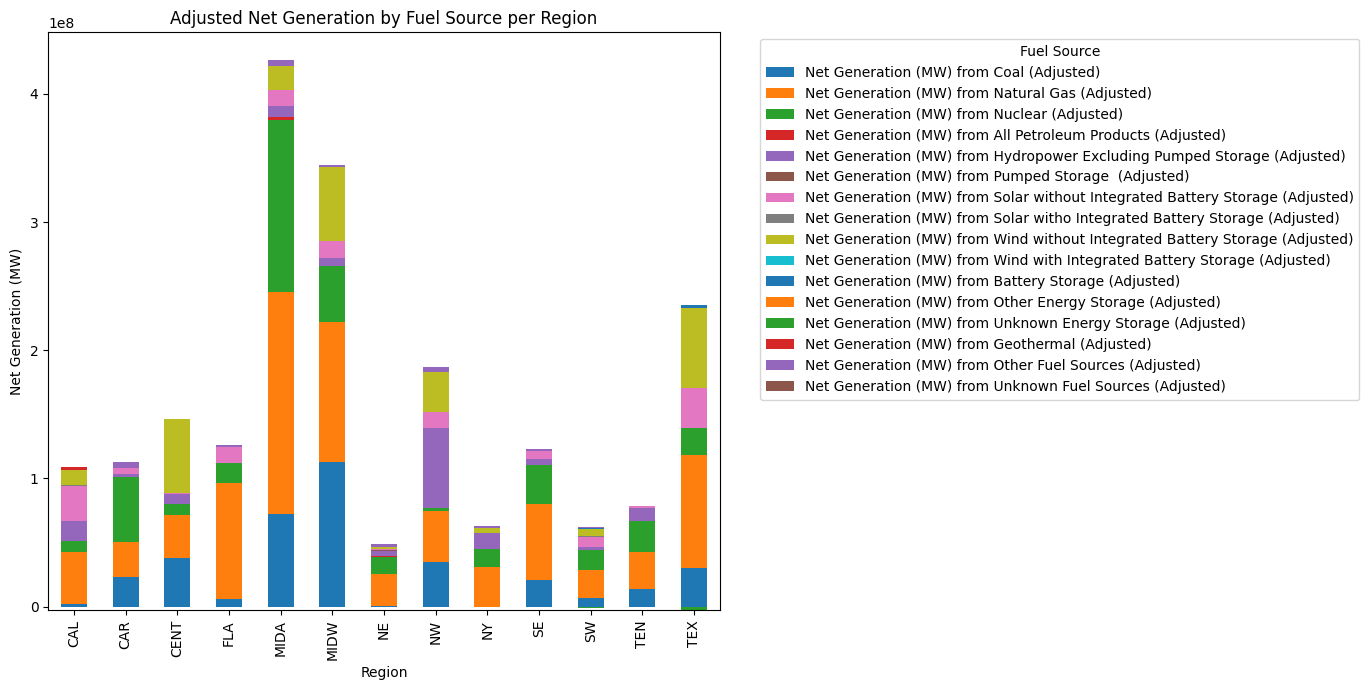

In [58]:
adjusted_cols = [col for col in df.columns if "(Adjusted)" in col and "Net Generation (MW) from" in col]
df[adjusted_cols] = df[adjusted_cols].fillna(0)
gen_by_region = df.groupby("Region")[adjusted_cols].sum()


ax = gen_by_region.plot(kind="bar", stacked=True, figsize=(14, 7))
plt.title("Adjusted Net Generation by Fuel Source per Region")
plt.ylabel("Net Generation (MW)")
plt.xlabel("Region")
plt.legend(title="Fuel Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()